In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# EDA

In [2]:
data_csv = pd.read_csv(r'C:\Users\Gopi.C\UCI\AirQualityUCI\AirQualityUCI.csv')
data_xlsx = pd.read_excel(r'C:\Users\Gopi.C\UCI\AirQualityUCI\AirQualityUCI.xlsx')

In [3]:
print('Blanks in XLSX -',data_xlsx.isnull().values.any())
print('Blank in CSV - ',data_csv.isnull().values.any())

Blanks in XLSX - False
Blank in CSV -  True


In [4]:
data_xlsx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 16 columns):
Date             9357 non-null datetime64[ns]
Time             9357 non-null object
CO(GT)           9357 non-null float64
PT08.S1(CO)      9357 non-null float64
NMHC(GT)         9357 non-null int64
C6H6(GT)         9357 non-null float64
PT08.S2(NMHC)    9357 non-null float64
NOx(GT)          9357 non-null float64
PT08.S3(NOx)     9357 non-null float64
NO2(GT)          9357 non-null float64
PT08.S4(NO2)     9357 non-null float64
PT08.S5(O3)      9357 non-null float64
T                9357 non-null float64
RH               9357 non-null float64
AH               9357 non-null float64
Unnamed: 15      9357 non-null float64
dtypes: datetime64[ns](1), float64(13), int64(1), object(1)
memory usage: 1.1+ MB


In [5]:
data_xlsx.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604,5182.263412
std,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670,1804.182835
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-2600.000000
25%,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275,4491.912236
50%,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823,5193.599588
75%,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223,6108.824802
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036,10775.731905


In [6]:
data_xlsx.shape

(9357, 16)

In [7]:
# Missing values are tagged with -200 value, hence replacing -200 with NaN
data_xlsx.replace(to_replace= -200, value= np.NaN, inplace= True)

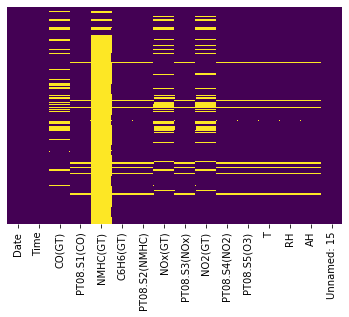

In [8]:
# show missing value in the heatmap
sb.heatmap(data_xlsx.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [9]:
# Dropping NMHC(GT) Column since its missing most of the values
data_xlsx.drop(['NMHC(GT)'], axis= 1, inplace= True)

In [10]:
# Dropping rows which have all NaN values
data_xlsx.loc[:,'Row_Total'] = data_xlsx.sum(numeric_only=True, axis=1)

In [11]:
# We can drop rows which consists only NaN values
data_xlsx.drop(data_xlsx[data_xlsx['Row_Total'] == 0].index, inplace = True) 

In [12]:
data_xlsx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 16 columns):
Date             9357 non-null datetime64[ns]
Time             9357 non-null object
CO(GT)           7674 non-null float64
PT08.S1(CO)      8991 non-null float64
C6H6(GT)         8991 non-null float64
PT08.S2(NMHC)    8991 non-null float64
NOx(GT)          7718 non-null float64
PT08.S3(NOx)     8991 non-null float64
NO2(GT)          7715 non-null float64
PT08.S4(NO2)     8991 non-null float64
PT08.S5(O3)      8991 non-null float64
T                8991 non-null float64
RH               8991 non-null float64
AH               8991 non-null float64
Unnamed: 15      9357 non-null float64
Row_Total        9357 non-null float64
dtypes: datetime64[ns](1), float64(14), object(1)
memory usage: 1.2+ MB


In [13]:
# Changing the data type of Date and Time
data_xlsx['DateTime'] = data_xlsx['Date'].astype(str) + ' ' + data_xlsx['Time'].astype(str)
data_xlsx['DateTime'] = pd.to_datetime(data_xlsx['DateTime'], format='%Y-%m-%d %H:%M:%S')
print(data_xlsx['DateTime'].iloc[:2])

0   2004-03-10 18:00:00
1   2004-03-10 19:00:00
Name: DateTime, dtype: datetime64[ns]


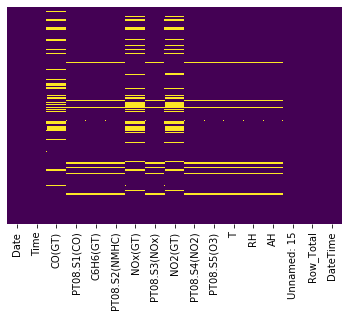

In [14]:
# show missing value in the heatmap
sb.heatmap(data_xlsx.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [15]:
# Filling Missing Values with Mean, Median or interpolation

In [16]:
print(data_xlsx.columns)

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH', 'Unnamed: 15', 'Row_Total', 'DateTime'],
      dtype='object')


In [17]:
data_xlsx.drop(['Unnamed: 15'], axis= 1, inplace= True)

In [18]:
interpolatelist = [x for x in data_xlsx.columns if x not in ['Date','Time','Row_Total','DateTime']]

In [19]:
for col in interpolatelist:
    data_xlsx[col].interpolate(method='linear', inplace=True)

In [20]:
data_xlsx.isnull().values.any()

False

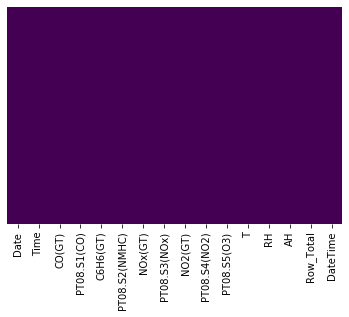

In [21]:
# Checking is there is any missing values
sb.heatmap(data_xlsx.isnull(), yticklabels=False, cbar=False,cmap='viridis')

In [22]:
data_xlsx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 16 columns):
Date             9357 non-null datetime64[ns]
Time             9357 non-null object
CO(GT)           9357 non-null float64
PT08.S1(CO)      9357 non-null float64
C6H6(GT)         9357 non-null float64
PT08.S2(NMHC)    9357 non-null float64
NOx(GT)          9357 non-null float64
PT08.S3(NOx)     9357 non-null float64
NO2(GT)          9357 non-null float64
PT08.S4(NO2)     9357 non-null float64
PT08.S5(O3)      9357 non-null float64
T                9357 non-null float64
RH               9357 non-null float64
AH               9357 non-null float64
Row_Total        9357 non-null float64
DateTime         9357 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(13), object(1)
memory usage: 1.2+ MB


In [23]:
# for year trend visualization perpose, this helps
data_xlsx['Year'] = data_xlsx['DateTime'].map(lambda x: x.year)
print(data_xlsx['Year'].iloc[:2])

0    2004
1    2004
Name: Year, dtype: int64


In [24]:
data_xlsx['YearMonth'] = pd.to_datetime(data_xlsx.DateTime).dt.to_period('m')
print(data_xlsx['YearMonth'].iloc[:2])

0    2004-03
1    2004-03
Name: YearMonth, dtype: period[M]


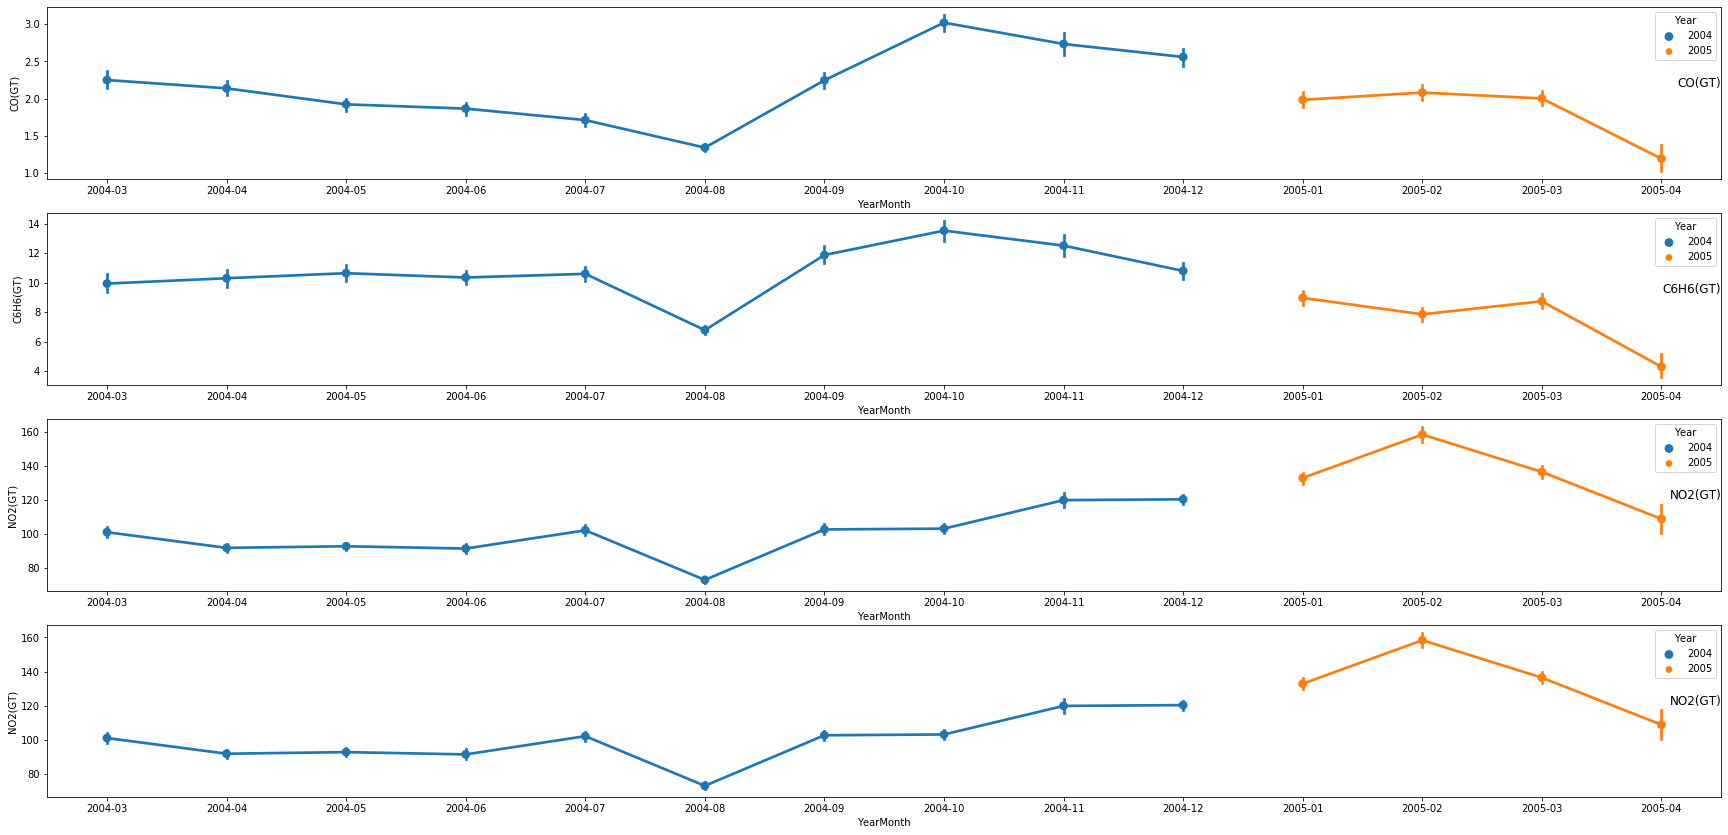

In [25]:
# observe year trend. The concentration shows that all the curves drop until 2004/08 and then rise
# why?
plt.figure(figsize=(30,60))

showList = [x for x in data_xlsx.columns if x not in ['Date', 'Time']]
gasList = ['CO(GT)', 'C6H6(GT)', 'NO2(GT)', 'NO2(GT)']
for i, col in enumerate(gasList, start=1):
    plt.subplot(len(showList), 1, i)    
    sb.pointplot(x='YearMonth', y=col, hue='Year', data=data_xlsx)
    plt.title(col, y=0.5, loc='right')
plt.show()

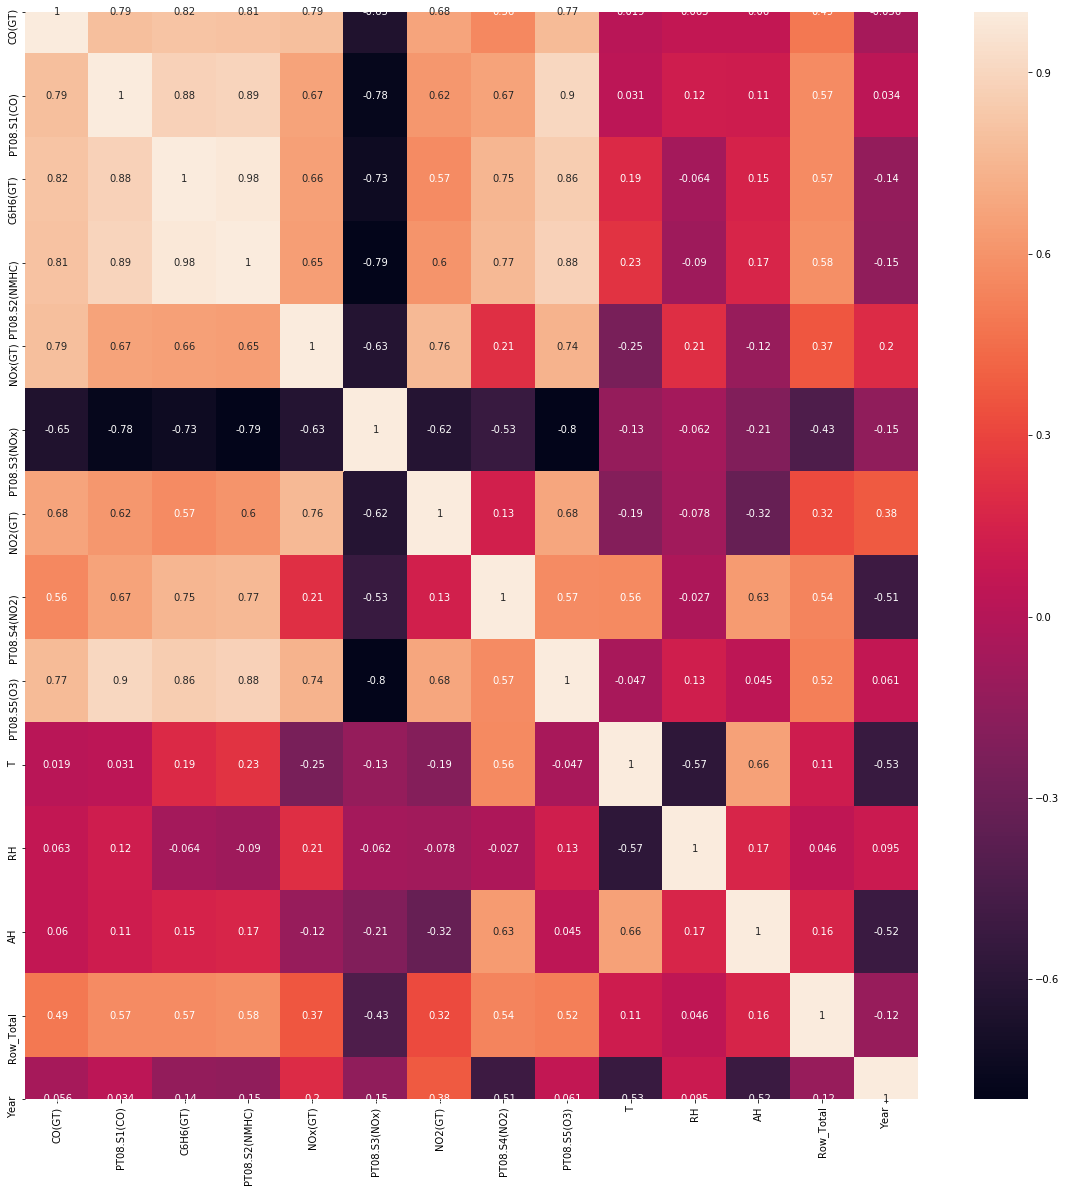

In [26]:
plt.figure(figsize=(20,20))
sb.heatmap(data_xlsx.corr(), annot=True)